### Actividad 2: KNN sobre el Congreso 2018-2022
El objetivo de esta actividad es utilizar el algoritmo KNN para clasificar a los diputados del Congreso 2018-2022 a partir de tres `y`: el partido, el pacto o su ideología (izquierda o derecha). 


Aparte de los 3 `y`, hay dos características `x1` y `x2` que utilizarán para entrenar los modelos. Estas dos características se obtuvieron tras realizar una reducción de dimensionalidad utilizando PCA, un algoritmo que se estudiará más adelante en el curso. En resumidas cuentas, este algoritmo tomó las más de 5.000 votaciones del Congreso anterior y las redujo a 2 dimensiones que son distintivas para cada diputado. Veamos el dataset.

In [1]:
!pip install altair

You should consider upgrading via the 'c:\users\rodri\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

### Descargar datos

In [3]:
# Descargamos los datos
url='https://drive.google.com/uc?id=1rsyHdVpRqKj5UQpiObP-Ko2va2yEfWhL'
df = pd.read_csv(url, index_col='name')

df.head()

,x1,x2,party,pact,ideology
name,,,,,
Marcela Hernando,-1.508095,-0.352802,PR,La Fuerza de la Mayoría,izquierda
Pablo Prieto,1.696765,-0.070751,RN,Chile Vamos,derecha
Sebastián Alvarez,1.788885,-0.022077,EVO,Chile Vamos,derecha
María José Hoffmann,2.121502,0.261220,UDI,Chile Vamos,derecha
Guillermo Ramírez,2.161527,0.308997,UDI,Chile Vamos,derecha


Si bien 155 diputados fueron electos, se eliminaron a 2 porque no pertenecían a un cluster de partido mayor a 1.

In [4]:
df.shape

(153, 5)

Al graficar ambas dimensiones, vemos la distribución de los diputados a lo largo del mapa. En este caso, distinguimos a los diputados a partir del pacto con que fueron electos.

In [5]:
import altair as alt
alt.Chart(df.reset_index()).mark_point().encode(
    x='x1', y='x2', color='pact', tooltip='name'
).interactive()

alt.Chart(...)

### [0.5 puntos] Separar el dataset en X e y
A partir del dataset, genera dos datasets:
- X, contiene las características `x1`, `x2`
- y, contiene las columnas con los labels `party`, `pact`, `ideology`


In [6]:
X = df[['x1', 'x2']]
y = df[['party', 'pact', 'ideology']]

### [0.5 puntos] Generar los datasets de train y test
A través del método `train_test_split` de `sklearn`, separa los datasets `X` e `y` en un conjunto de entrenamiento y otro de test. Este método tiene ciertos parámetros que queremos que incluyas:
- el tamaño del set de test debe ser de un 20% del original
- ocupar un random_state de 11
- estratificar por partido

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=11, stratify=y.party)

## [1.5 puntos] Función knn_classifier
Construye una función `knn_classifier` que dado un cierto `k` y una columna de y `y_col`, entrena con el set de train un modelo con `KNeighborsClassifier` de `sklearn` y luego predice con el set de test. debe retornar un dataframe de dos columnas: `pred` que es la clase predicha para cada diputado del set de test y `real` que es el cluster real al que pertenece ese legislador.


In [8]:
from sklearn.neighbors import KNeighborsClassifier

def knn_classifier(k, y_col):
    global X_train, X_test, y_train, y_test
    
    knn  = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train[y_col])
    pred = knn.predict(X_test)
    
    df = pd.DataFrame({'pred': pred, 'real': y_test[y_col]})
    
    return df

## [0.5 puntos] Clasificación de Gabriel Boric y Diego Paulsen
Utiliza la función que creaste en el paso anterior para entrenar un modelo con `k=5` y que clasifique según el partido. Según el modelo entrenado
- ¿A qué partido pertenecería Gabriel Boric, actual Presidente de Chile?
- ¿A qué partido pertenecería Diego Paulsen, ex Presidente del Congreso?

In [9]:
party_preds = knn_classifier(5, 'party')
boric_pred  = party_preds[party_preds.index == 'Gabriel Boric']
diego_pred  = party_preds[party_preds.index == 'Diego Paulsen']

Escribe acá tus respuestas:
- Boric: PC
- Paulsen: UNI

## [0.5 puntos] Matriz de confusión
A partir del modelo anterior, grafica la matriz de confusión utilizando la librería de visualización que prefieras. En el eje x deben ir las clases predichas, mientras que en el eje y las reales. 

<AxesSubplot:>

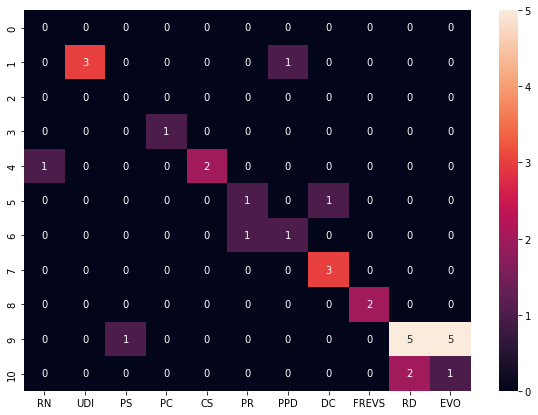

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

mapper = dict()
cont   = 0
for x in df.party.unique():
    mapper[x] = cont
    cont += 1
    
c_party_preds = party_preds.copy()

cM = confusion_matrix(c_party_preds.pred, c_party_preds.real)
cM_df = pd.DataFrame(columns=c_party_preds.real.unique(), data=cM)

plt.figure(figsize = (10,7))
sn.heatmap(cM_df, annot=True)

## [2 puntos] Pruebas de hiperparámetros
Dados los `K` de la celda inferior, ahora tienes que probar qué combinación de `k` y `y_col` da mejores resultados. La métrica que debes utilizar es accuracy.

In [11]:
K = [1, 2, 3, 5, 7, 10, 15, 20, 35, 50]
y_cols = ['party', 'pact', 'ideology']

In [12]:
accuracies = dict()

for col in y_cols:
    accuracies[col] = []
    for k in K:
        result = knn_classifier(k, col)
        acc = ((result[result.pred == result.real]).shape[0] / result.shape[0])
        
        accuracies[col].append(acc)

## [0.5 puntos] Graficar resultados de hiperparámetros
Utilizando la libería que prefieras, grafica la evolución de la accuracy a través de `k` para cada uno de los 3 `y`. ¿Cuál es el mejor `k` para clasificar según pactos? ¿Por qué crees que en general es bajo el _accuracy_ de clasificar por partido? 

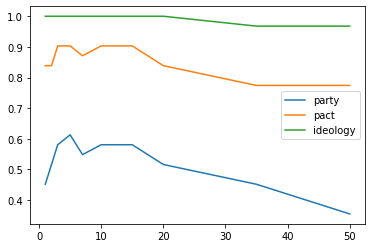

In [13]:
import seaborn as sns

for col in y_cols:
    sns.lineplot(x=K, y=accuracies[col], label=col)

RESPUESTA: Justificaria un mal rendimiento al clasificar por partido dado que los clusters se solapan demasiado entre si.
(lo mire usando la función que crearon arriba pero cambiado el color a 'party')